In [ ]:
!pip install brian2

In [ ]:
from brian2 import *

In [ ]:
taupre      = taupost = 20*ms
Apre        = 0.01
Apost       = -Apre*taupre/taupost*1.05
tmax        = 50*ms
N_post      = 2
N_pre       = 10
spike_dt    = []

In [ ]:
pre         = NeuronGroup(N_pre, 'tspike:second', threshold='t>tspike', refractory=100*ms)
post        = NeuronGroup(N_post, 'tspike:second', threshold='t>tspike', refractory=100*ms)
pre.tspike  = 'i*tmax /(N_pre -1)'
post.tspike = '(N_post-1-i)*tmax / (N_post-1)'

In [ ]:
S = Synapses(pre, post,
             '''
             w : 1
             dapre/dt = -apre/taupre : 1 (event-driven)
             dapost/dt = -apost/taupost : 1 (event-driven)
             ''',
             on_pre='''
             apre += Apre
             w = w+apost
             ''',
             on_post='''
             apost += Apost
             w = w+apre
             ''')
S.connect(i=numpy.arange(10), j=0)
S.connect(i=numpy.arange(10), j=1)

In [ ]:
run(tmax+1*ms)

In [ ]:
for x in range(2):
  for y in range(10):
    spike_dt.append(post.tspike[x] - pre.tspike[y])

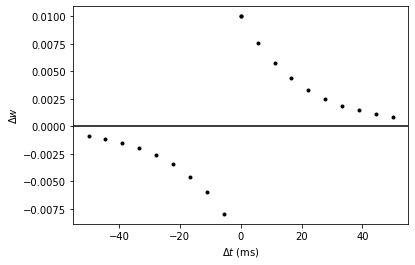

In [ ]:
plot(spike_dt/ms, S.w, '.k')
xlabel(r'$\Delta t$ (ms)')
ylabel(r'$\Delta w$')
axhline(0, ls='-', c='k')
show()